In [390]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta

### Ticker - Company Name Collection:

In [162]:
!pip install yahoo_fin

### Stock Data of a Given Ticker:

In [374]:
from yahoo_fin import stock_info as si

def stock_data(stock_name):
    df = si.get_data(stock_name, start_date=(date.today() - relativedelta(years=3)).strftime('%m/%d/%Y'), 
                     end_date=date.today().strftime('%m/%d/%Y'))
    return df
ticker='HD'
company_name='Home Depot'
df = stock_data(ticker)
df.head()


,open,high,low,close,adjclose,volume,ticker
2020-06-08,252.490005,256.809998,252.259995,256.769989,239.264954,3811900,HD
2020-06-09,255.330002,258.290009,253.860001,256.760010,239.255646,3716100,HD
2020-06-10,257.450012,259.290009,254.220001,254.449997,237.103104,3589800,HD
2020-06-11,248.860001,250.619995,238.740005,239.470001,223.144394,6563700,HD
2020-06-12,243.070007,246.389999,237.050003,242.449997,225.921204,5238500,HD


In [165]:
df.tail()

,open,high,low,close,adjclose,volume,ticker
2023-05-31,289.589996,290.000000,281.959991,283.450012,283.450012,18288800,HD
2023-06-01,284.049988,289.220001,279.980011,288.390015,288.390015,4305100,HD
2023-06-02,290.649994,296.209991,289.720001,295.940002,295.940002,4514600,HD
2023-06-05,295.619995,295.720001,291.369995,293.100006,293.100006,3028800,HD
2023-06-06,291.820007,296.920013,291.649994,296.000000,296.000000,2854800,HD


In [200]:
#Add target values for two weeks and one month. 
#Dataset has values for weekdays only, so two weeks will be 10 data points
# and one month will be 20 data points
df['TwoWeeks'] = df['close'].rolling(10).mean()
df['Month'] = df['close'].rolling(20).mean()
df.head()

,open,high,low,close,adjclose,volume,ticker,TwoWeeks,Month
2020-06-08,252.490005,256.809998,252.259995,256.769989,239.264938,3811900,HD,NaN,NaN
2020-06-09,255.330002,258.290009,253.860001,256.760010,239.255646,3716100,HD,NaN,NaN
2020-06-10,257.450012,259.290009,254.220001,254.449997,237.103119,3589800,HD,NaN,NaN
2020-06-11,248.860001,250.619995,238.740005,239.470001,223.144379,6563700,HD,NaN,NaN
2020-06-12,243.070007,246.389999,237.050003,242.449997,225.921188,5238500,HD,NaN,NaN


In [201]:
df.dropna(inplace=True)
df.head()

,open,high,low,close,adjclose,volume,ticker,TwoWeeks,Month
2020-07-06,250.270004,251.500000,247.039993,249.550003,232.537186,3133800,HD,247.481999,248.1370
2020-07-07,247.369995,250.779999,247.070007,247.350006,230.487167,2927800,HD,247.300999,247.6660
2020-07-08,247.869995,249.789993,246.220001,249.169998,232.183075,2294000,HD,247.187000,247.2865
2020-07-09,249.660004,250.509995,246.350006,247.960007,231.055588,2994700,HD,247.370000,246.9620
2020-07-10,248.289993,250.330002,246.639999,250.110001,233.058990,2745300,HD,247.842999,247.4940


### Google Trends of a Ticker:

In [61]:
!pip install pytrends

In [62]:
import pytrends
from pytrends.request import TrendReq

In [63]:
pytrends = TrendReq()
kw_list=['Home Depot']

In [194]:
#Gather Google trends for ticker 'HD' and Home Depot
pytrends.build_payload(kw_list, geo='', timeframe='{} {}'.format((date.today() - relativedelta(years=3)).strftime('%Y-%m-%d'),date.today().strftime('%Y-%m-%d')))#timeframe='2010-06-29 2023-05-16')
keyword_interest = pytrends.interest_over_time()
del keyword_interest['isPartial']
keyword_interest.columns.rename("{}".format(ticker))
keyword_interest.head()

,Home Depot
date,
2020-06-07,100
2020-06-14,100
2020-06-21,96
2020-06-28,97
2020-07-05,90


<AxesSubplot: title={'center': "Google Trends for 'Home Depot' in the last three years"}>

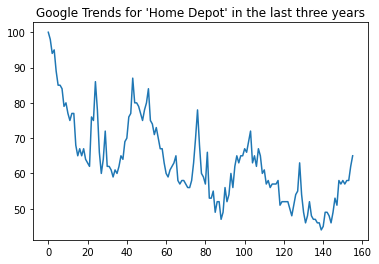

In [77]:
keyword_interest['Home Depot'].plot(title='Google Trends for \'Home Depot\' in the last three years')

In [202]:
df_combined = pd.concat([df, keyword_interest], axis=1)
#df_combined.dropna(subset='Month', inplace=True)
df_combined.head(20)

,open,high,low,close,adjclose,volume,ticker,TwoWeeks,Month,Home Depot
2020-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2020-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
2020-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
2020-07-06,250.270004,251.500000,247.039993,249.550003,232.537186,3133800.0,HD,247.481999,248.137000,NaN
2020-07-07,247.369995,250.779999,247.070007,247.350006,230.487167,2927800.0,HD,247.300999,247.666000,NaN
2020-07-08,247.869995,249.789993,246.220001,249.169998,232.183075,2294000.0,HD,247.187000,247.286500,NaN
2020-07-09,249.660004,250.509995,246.350006,247.960007,231.055588,2994700.0,HD,247.370000,246.962000,NaN
2020-07-10,248.289993,250.330002,246.639999,250.110001,233.058990,2745300.0,HD,247.842999,247.494000,NaN


Google Trends give values for Sundays only when the data is pulled in years. I will move Sunday values to the week after since we are concerned with trends rather than daily values.

In [203]:
df_combined['Home Depot'] = df_combined['Home Depot'].fillna(method='ffill')
df_combined.dropna(inplace=True)
df_combined.head(30)

,open,high,low,close,adjclose,volume,ticker,TwoWeeks,Month,Home Depot
2020-07-06,250.270004,251.500000,247.039993,249.550003,232.537186,3133800.0,HD,247.481999,248.137000,90.0
2020-07-07,247.369995,250.779999,247.070007,247.350006,230.487167,2927800.0,HD,247.300999,247.666000,90.0
2020-07-08,247.869995,249.789993,246.220001,249.169998,232.183075,2294000.0,HD,247.187000,247.286500,90.0
2020-07-09,249.660004,250.509995,246.350006,247.960007,231.055588,2994700.0,HD,247.370000,246.962000,90.0
2020-07-10,248.289993,250.330002,246.639999,250.110001,233.058990,2745300.0,HD,247.842999,247.494000,90.0
2020-07-13,251.919998,257.859985,249.089996,249.619995,232.602386,4437500.0,HD,248.703999,247.852500,86.0
2020-07-14,249.000000,258.179993,248.460007,257.790009,240.215408,4614200.0,HD,249.871001,248.674001,86.0
2020-07-15,260.140015,261.290009,255.149994,257.799988,240.224716,4343700.0,HD,250.600000,249.066500,86.0
2020-07-16,256.760010,260.500000,256.000000,258.079987,240.485641,2511200.0,HD,251.592999,249.427999,86.0
2020-07-17,260.029999,260.649994,257.720001,260.380005,242.628845,3091300.0,HD,252.781000,249.986499,86.0


### Pulling Twitter Data:

In [26]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\h\appdata\local\temp\pip-req-build-juq_wuvs
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\h\AppData\Local\Temp\pip-req-build-juq_wuvs'



  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev32+gb76f485-py3-none-any.whl size=73836 sha256=9d775c09eaf59037472b9b39e1128dbf1a2b324f9eafdcdd24b37e21ca2ae9e7
  Stored in directory: C:\Users\h\AppData\Local\Temp\pip-ephem-wheel-cache-ykny0dab\wheels\92\42\87\33fa9b18f7a75d02643a9ca3743339aec9be28c6796267c7d8
Successfully built snscrape
  Attempting uninstall: snscrape
    Found existing installation: snscrape 0.6.2.20230321.dev17+ge4c7644
    Uninstalling snscrape-0.6.2.20230321.dev17+ge4c7644:
      Successfully uninstalled snscrape-0.6.2.20230321.dev17+ge4c7644


In [27]:
kw_list

['HD', 'Home Depot']

In [48]:

# The following code collects data related to 'HD' and Home Depot from 
# "markets" and "MarketWatch" twitter accounts published in the last three years

import snscrape.modules.twitter as sntwitter
import pandas as pd
import datetime as dt
from datetime import date

# Creating list to append tweet data to
attributes_container = []

sources_all =['CNBC','cnn', 'cnnbrk','MarketWatch', 'Benzinga', 'Stocktwits','BreakoutStocks', 
          'bespokeinvest','WSJMarkets','Stephanie_Link','nytimesbusiness','IBDinvestors','WSJDealJournal',
         'business', 'TheEconomist','WSJ', 'ABC', 'CBSNews','FoxNews', 'NBCNews']

sources=['markets','MarketWatch']
for tweet in sntwitter.TwitterSearchScraper('from:{} since:{} until:{}'.format(sources[0], (date.today() - relativedelta(years=3)).strftime('%Y-%m-%d'), date.today().strftime('%Y-%m-%d'))).get_items():
    if 'Home Depot'.lower() in tweet.content.lower():
        attributes_container.append([tweet.date, tweet.content.split('http')[0]])
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Tweets"])
tweets_df.drop_duplicates(subset='Tweets',inplace=True)

attributes_container = []
for tweet in sntwitter.TwitterSearchScraper('from:{} since:{} until:{}'.format(sources[1], (date.today() - relativedelta(years=3)).strftime('%Y-%m-%d'), date.today().strftime('%Y-%m-%d'))).get_items():
    if 'Home Depot'.lower() in tweet.content.lower():
        attributes_container.append([tweet.date, tweet.content.split('http')[0]])
# Creating a dataframe from the tweets list above 
tweets_df_marketwatch = pd.DataFrame(attributes_container, columns=["Date Created", "Tweets"])
print(tweets_df_marketwatch.shape)
tweets_df_marketwatch.drop_duplicates(subset='Tweets',inplace=True)


<ipython-input-48-7402781546de>:18: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  if 'Home Depot'.lower() in tweet.content.lower():
<ipython-input-48-7402781546de>:19: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.date, tweet.content.split('http')[0]])
Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutErro

User 1520311065174806528 not found in user refs in card on tweet 1545932961069031425
Unavailable user in card on tweet 1537418184285949952
User 1520311065174806528 not found in user refs in card on tweet 1537418184285949952
Unavailable user in card on tweet 1522691690271633408
User 1520311065174806528 not found in user refs in card on tweet 1522691690271633408
Unavailable user in card on tweet 1520581911000846336
User 1520311065174806528 not found in user refs in card on tweet 1520581911000846336
Unavailable user in card on tweet 1519919220619984897
User 1520311065174806528 not found in user refs in card on tweet 1519919220619984897
Unavailable user in card on tweet 1514873528079851524
User 1520311065174806528 not found in user refs in card on tweet 1514873528079851524
Unavailable user in card on tweet 1514853462831509515
User 1520311065174806528 not found in user refs in card on tweet 1514853462831509515
Unavailable user in card on tweet 1502695958618025992
User 1520311065174806528 no

KeyError: 'affiliates_highlighted_label'

In [109]:
pd.set_option("max_colwidth", None)
tweets_df.head()

,Date Created,Tweets
0,2023-03-01 18:05:43+00:00,"From Meta to Home Depot, corporate America is talking about AI on earnings calls"
1,2023-02-21 19:06:41+00:00,"Home Depot, Walmart and DocuSign.\n\n@RitikaGuptaTV has your stocks to watch this Tuesday"
2,2023-02-21 15:15:07+00:00,Home Depot forecasts a fiscal-year profit decline and announces plans for a $1 billion wage investment for hourly workers
3,2022-11-15 18:11:03+00:00,"Home Depot reported profit that beat expectations, with the CEO saying consumers are staying resilient. But a drop in transactions volume has investors concerned"
4,2022-08-16 15:09:26+00:00,Home Depot’s second-quarter results beat Wall Street estimates even as the US housing market shows signs of cooling off


In [111]:
tweets_df_marketwatch.shape

(1159, 3)

### Company data in Google News:

In [27]:
#!pip install setuptools==57.5.0

In [107]:
!pip install pygooglenews 

In [112]:
kw_list

['Home Depot']

In [113]:

import pygooglenews
from pygooglenews import GoogleNews
gn = GoogleNews()
headlines_related = []

date_list = pd.date_range(end=date.today().strftime('%Y-%m-%d'), start=(date.today()-relativedelta(years=3)).strftime('%Y-%m-%d')).tolist()
clean_date = [str(i).split(" ")[0] for i in date_list]
for date in clean_date:
    headlines = []
    for word in kw_list:
        search =gn.search(word,when=date)
        for item in search['entries']:
            headlines.append(item['title'])
    #We have headlines of the news whose body may contain one of the keywords.
    #We will use only headlines to make predictions but some headlines do not contain any of the keywords.
    #Only include headlines that has one of the keywords
    for headline in headlines:
        for i in range(len(kw_list)):
            if kw_list[i] in headline:
                if headline not in headlines_related:
                    headlines_related.append((date,headline))
len(headlines_related)

1739

In [115]:
headlines_related[:10]

[('2020-06-08',
  "Home Depot Father's Day sales: Save on DeWalt and Milwaukee ... - USA TODAY"),
 ('2020-06-17',
  "Here's the Defining Characteristic of Home Depot's Success - Nasdaq"),
 ('2020-06-17',
  'Home Depot’s new outdoor tool sale takes up to 40% off RYOBI, DEWALT, more - 9to5Toys'),
 ('2020-06-18',
  'Home Depot’s Last Chance Father’s Day sale takes up to 35% off tools and more - 9to5Toys'),
 ('2020-06-24',
  '1 dead, 1 hurt in Home Depot parking lot crash in Costa Mesa - OCRegister'),
 ('2020-06-25',
  "'It's dehumanizing': Home Depot employee felt colleague's racist ... - Hamilton Spectator"),
 ('2020-06-30',
  'Home Depot 4th of July sale: Shop top deals on DeWalt, Dyna-Glo ... - USA TODAY'),
 ('2020-06-30',
  'The Home Depot Announces Renewable Energy Goal and Pledges ... - PR Newswire'),
 ('2020-07-01',
  'Home Depot bans some rope sales after nooses were found tied on ... - Courier Journal'),
 ('2020-07-02',
  'Home Depot changes rope sales practice after nooses are f

In [404]:

df_news = pd.DataFrame(headlines_related, columns=['Date', 'Headline'])
df_news['Headline'] = df_news['Headline'].apply(lambda x: x.split('-')[0])
df_news['Date'] = pd.to_datetime(df_news['Date'])
print(df_news.shape)
df_news.drop_duplicates(subset='Headline', inplace=True)
print(df_news.shape)
df_news.head()


(1739, 2)
(1373, 2)


,Date,Headline
0,2020-06-08,Home Depot Father's Day sales: Save on DeWalt and Milwaukee ...
1,2020-06-17,Here's the Defining Characteristic of Home Depot's Success
2,2020-06-17,"Home Depot’s new outdoor tool sale takes up to 40% off RYOBI, DEWALT, more"
3,2020-06-18,Home Depot’s Last Chance Father’s Day sale takes up to 35% off tools and more
4,2020-06-24,"1 dead, 1 hurt in Home Depot parking lot crash in Costa Mesa"


In [405]:
df_news.to_csv('home_depot_news.csv')

## Sentiment Analysis of All Text Data:

### Tweets:

In [145]:
!pip install vaderSentiment

In [124]:
tweets_df_marketwatch.drop("User Name", axis=1, inplace=True)

In [125]:
#combine tweets coming from markets, and marketwatch
markets = pd.concat([tweets_df, tweets_df_marketwatch])
markets.shape

(1169, 2)

In [126]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer() 
def vader(row):
    comp = sid.polarity_scores(row)['compound']
    return comp

In [127]:
import re
markets['Tweets'] = markets['Tweets'].apply(lambda x: re.sub("amp;","&", x))
markets['Tweets'] = markets['Tweets'].apply(lambda x: re.sub("\n"," ", x))
markets['Tweets'] = markets['Tweets'].apply(lambda x: re.sub("\xa0"," ", x))
markets.head()

,Date Created,Tweets
0,2023-03-01 18:05:43+00:00,"From Meta to Home Depot, corporate America is talking about AI on earnings calls"
1,2023-02-21 19:06:41+00:00,"Home Depot, Walmart and DocuSign. @RitikaGuptaTV has your stocks to watch this Tuesday"
2,2023-02-21 15:15:07+00:00,Home Depot forecasts a fiscal-year profit decline and announces plans for a $1 billion wage investment for hourly workers
3,2022-11-15 18:11:03+00:00,"Home Depot reported profit that beat expectations, with the CEO saying consumers are staying resilient. But a drop in transactions volume has investors concerned"
4,2022-08-16 15:09:26+00:00,Home Depot’s second-quarter results beat Wall Street estimates even as the US housing market shows signs of cooling off


In [133]:
markets['Date Created'] = markets['Date Created'].astype('str')

In [134]:
markets['Date Created'] = markets['Date Created'].apply(lambda x:x[:11])
markets.head()

,Date Created,Tweets
0,2023-03-01,"From Meta to Home Depot, corporate America is talking about AI on earnings calls"
1,2023-02-21,"Home Depot, Walmart and DocuSign. @RitikaGuptaTV has your stocks to watch this Tuesday"
2,2023-02-21,Home Depot forecasts a fiscal-year profit decline and announces plans for a $1 billion wage investment for hourly workers
3,2022-11-15,"Home Depot reported profit that beat expectations, with the CEO saying consumers are staying resilient. But a drop in transactions volume has investors concerned"
4,2022-08-16,Home Depot’s second-quarter results beat Wall Street estimates even as the US housing market shows signs of cooling off


In [136]:
markets['Date Created'] = pd.to_datetime(markets['Date Created'])
markets.sort_values(by='Date Created', inplace=True)
markets.index =range(markets.shape[0])
markets.head()

,Date Created,Tweets
0,2020-06-06,"What to make of the recent jobs numbers? Joseph Stiglitz says there's more than meets the eye, including those who aren't considered ""unemployed,"" but aren't working. And without intervention, things may get worse, he says. WATCH:"
1,2020-06-08,"Bull, bear, bull, bear and now a new bull market — whatever’s next, these stocks will outperform, strategist says"
2,2020-06-09,HD Supply misses on profit expectations but beats on sales
3,2020-06-11,"Normally, Madrid swells with tourists. Our editor @bkollmeyer writes about how locals are reclaiming their city in a summer without travel."
4,2020-06-11,"Should I tell my sister that her husband, a notorious spender, has a secret credit card?"


In [138]:
markets['VaderSent'] = markets['Tweets'].apply(vader)
markets

,Date Created,Tweets,VaderSent
0,2020-06-06,"What to make of the recent jobs numbers? Joseph Stiglitz says there's more than meets the eye, including those who aren't considered ""unemployed,"" but aren't working. And without intervention, things may get worse, he says. WATCH:",-0.6310
1,2020-06-08,"Bull, bear, bull, bear and now a new bull market — whatever’s next, these stocks will outperform, strategist says",0.0000
2,2020-06-09,HD Supply misses on profit expectations but beats on sales,0.1280
3,2020-06-11,"Normally, Madrid swells with tourists. Our editor @bkollmeyer writes about how locals are reclaiming their city in a summer without travel.",0.0000
4,2020-06-11,"Should I tell my sister that her husband, a notorious spender, has a secret credit card?",-0.0772
...,...,...,...
1164,2023-05-30,Trans designer in Target anti-LGBTQ+ backlash says he was ‘dealt the worst hand’,-0.6249
1165,2023-05-31,"Brown-Forman to invest $200 million to expand Tequila distillery in Jalisco, Mexico",0.3182
1166,2023-06-02,Zelle and Chase working to resolve duplicate-payments issue,0.3818
1167,2023-06-03,"The ‘best job in America’ pays over $120,000 a year, offers low stress, healthy work-life balance — and its workers are in high demand",-0.4019


In [139]:
def bins(value):
    hold_sent = []
    if -1 <= value < -0.33:
        hold_sent.append('neg')
    if -0.33<=value<=0.33:
        hold_sent.append('neu')
    if 0.33 < value <= 1:
        hold_sent.append('pos')
    return hold_sent
markets['sentiment'] = markets['VaderSent'].apply(bins)
values=[]
for i in markets['sentiment'].values:
    values.append(i[0])
markets['sentiment']=values
markets.head(10)

,Date Created,Tweets,VaderSent,sentiment
0,2020-06-06,"What to make of the recent jobs numbers? Joseph Stiglitz says there's more than meets the eye, including those who aren't considered ""unemployed,"" but aren't working. And without intervention, things may get worse, he says. WATCH:",-0.6310,neg
1,2020-06-08,"Bull, bear, bull, bear and now a new bull market — whatever’s next, these stocks will outperform, strategist says",0.0000,neu
2,2020-06-09,HD Supply misses on profit expectations but beats on sales,0.1280,neu
3,2020-06-11,"Normally, Madrid swells with tourists. Our editor @bkollmeyer writes about how locals are reclaiming their city in a summer without travel.",0.0000,neu
4,2020-06-11,"Should I tell my sister that her husband, a notorious spender, has a secret credit card?",-0.0772,neu
5,2020-06-12,Palantir Technologies Inc. is reportedly preparing to confidentially file for its long-awaited IPO.,0.0000,neu
6,2020-06-15,It's a well-known secret of Wall Street: Little business actually takes place in New York. We spoke to several Wall Street road warriors to learn what the past 3 months have been like when they can't fly anywhere.,0.3612,pos
7,2020-06-16,Dear airline passengers: Wear your face mask or you might get banned from flying.,-0.1027,neu
8,2020-06-18,Facebook takes down Trump-Pence ads featuring symbols previously used by Nazis,0.0000,neu
9,2020-06-18,Dow opens with 170 point drop as jobless claims stay elevated,-0.2732,neu


In [403]:
markets.to_csv('home_depot_tweets.csv')

In [140]:
#Each week determine the weight of positive, neutral and negative tweets:
tweets_weight = pd.DataFrame(markets.groupby([pd.Grouper(key='Date Created', freq='W')])['sentiment'], columns=['Date','Data'])
tweets_weight.head()
for i in range(len(tweets_weight)):
    n = dict(tweets_weight.loc[i,'Data'].value_counts(normalize=True))
    if 'neg' not in n:
        n['neg']=0
    if 'pos' not in n:
        n['pos']=0
    if 'neu' not in n:
        n['neu']=0
    tweets_weight.loc[i,'tweet_pos'] = n['pos']
    tweets_weight.loc[i,'tweet_neg'] = n['neg']
    tweets_weight.loc[i,'tweet_neu'] = n['neu']
tweets_weight

,Date,Data,tweet_pos,tweet_neg,tweet_neu
0,2020-06-07,"0 neg Name: sentiment, dtype: object",0.000000,1.000000,0.000000
1,2020-06-14,"1 neu 2 neu 3 neu 4 neu 5 neu Name: sentiment, dtype: object",0.000000,0.000000,1.000000
2,2020-06-21,"6 pos 7 neu 8 neu 9 neu 10 pos 11 neu Name: sentiment, dtype: object",0.333333,0.000000,0.666667
3,2020-06-28,"12 neu 13 neu 14 neu 15 neu 16 neg 17 neu 18 neu 19 neg 20 neu Name: sentiment, dtype: object",0.000000,0.222222,0.777778
4,2020-07-05,"21 neg 22 neg 23 neg 24 neg 25 pos 26 neu 27 neg 28 neu 29 neu 30 neu Name: sentiment, dtype: object",0.100000,0.500000,0.400000
...,...,...,...,...,...
153,2023-05-14,"1141 pos 1142 neu 1143 neu 1144 neu 1145 neg Name: sentiment, dtype: object",0.200000,0.200000,0.600000
154,2023-05-21,"1146 neu 1147 neu 1148 neu 1149 neu 1150 neu 1151 neu 1152 neg 1153 neu 1154 neg 1155 neu 1156 pos 1157 neu 1158 neu 1159 neu 1160 neu Name: sentiment, dtype: object",0.066667,0.133333,0.800000
155,2023-05-28,"1161 neg 1162 neg 1163 neg Name: sentiment, dtype: object",0.000000,1.000000,0.000000
156,2023-06-04,"1164 neg 1165 neu 1166 pos 1167 neg Name: sentiment, dtype: object",0.250000,0.500000,0.250000


In [141]:
tweets_weight.drop('Data', inplace=True, axis=1)
tweets_weight.head()

,Date,tweet_pos,tweet_neg,tweet_neu
0,2020-06-07,0.000000,1.000000,0.000000
1,2020-06-14,0.000000,0.000000,1.000000
2,2020-06-21,0.333333,0.000000,0.666667
3,2020-06-28,0.000000,0.222222,0.777778
4,2020-07-05,0.100000,0.500000,0.400000


<AxesSubplot: title={'center': "Tweets' Sentiment"}, xlabel='Date'>

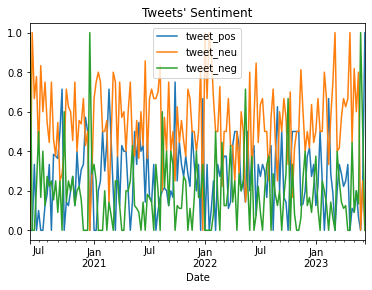

In [142]:
tweets_weight.plot(x='Date', y=['tweet_pos','tweet_neu','tweet_neg'],title='Tweets\' Sentiment')

### Google News:

In [407]:
df_news['VaderSent'] = df_news['Headline'].apply(vader)
df_news.head(10)

,Date,Headline,VaderSent
0,2020-06-08,Home Depot Father's Day sales: Save on DeWalt and Milwaukee ...,0.4939
1,2020-06-17,Here's the Defining Characteristic of Home Depot's Success,0.5719
2,2020-06-17,"Home Depot’s new outdoor tool sale takes up to 40% off RYOBI, DEWALT, more",0.0000
3,2020-06-18,Home Depot’s Last Chance Father’s Day sale takes up to 35% off tools and more,0.2500
4,2020-06-24,"1 dead, 1 hurt in Home Depot parking lot crash in Costa Mesa",-0.8860
5,2020-06-25,'It's dehumanizing': Home Depot employee felt colleague's racist ...,-0.8126
6,2020-06-30,"Home Depot 4th of July sale: Shop top deals on DeWalt, Dyna",0.2023
7,2020-06-30,The Home Depot Announces Renewable Energy Goal and Pledges ...,0.2732
8,2020-07-01,Home Depot bans some rope sales after nooses were found tied on ...,0.0000
9,2020-07-02,Home Depot changes rope sales practice after nooses are found in store,0.0000


In [408]:
df_news['Date'] = pd.to_datetime(df_news['Date'])

In [409]:
df_news['sentiment'] = df_news['VaderSent'].apply(bins)
values=[]
for i in df_news['sentiment'].values:
    values.append(i[0])
df_news['sentiment']=values
df_news.head(10)


,Date,Headline,VaderSent,sentiment
0,2020-06-08,Home Depot Father's Day sales: Save on DeWalt and Milwaukee ...,0.4939,pos
1,2020-06-17,Here's the Defining Characteristic of Home Depot's Success,0.5719,pos
2,2020-06-17,"Home Depot’s new outdoor tool sale takes up to 40% off RYOBI, DEWALT, more",0.0000,neu
3,2020-06-18,Home Depot’s Last Chance Father’s Day sale takes up to 35% off tools and more,0.2500,neu
4,2020-06-24,"1 dead, 1 hurt in Home Depot parking lot crash in Costa Mesa",-0.8860,neg
5,2020-06-25,'It's dehumanizing': Home Depot employee felt colleague's racist ...,-0.8126,neg
6,2020-06-30,"Home Depot 4th of July sale: Shop top deals on DeWalt, Dyna",0.2023,neu
7,2020-06-30,The Home Depot Announces Renewable Energy Goal and Pledges ...,0.2732,neu
8,2020-07-01,Home Depot bans some rope sales after nooses were found tied on ...,0.0000,neu
9,2020-07-02,Home Depot changes rope sales practice after nooses are found in store,0.0000,neu


In [410]:
df_news.to_csv('home_depot_news_sent.csv')

In [414]:
news_weight = pd.DataFrame(df_news.groupby([pd.Grouper(key='Date', freq='W')])['sentiment'], columns=['Date','Data'])
for i in range(len(news_weight)):
    n = dict(news_weight.loc[i,'Data'].value_counts(normalize=True))
    if 'neg' not in n:
        n['neg']=0
    if 'pos' not in n:
        n['pos']=0
    if 'neu' not in n:
        n['neu']=0
    news_weight.loc[i,'news_pos'] = n['pos']
    news_weight.loc[i,'news_neg'] = n['neg']
    news_weight.loc[i,'news_neu'] = n['neu']
news_weight

,Date,Data,news_pos,news_neg,news_neu
0,2020-06-14,"0 pos Name: sentiment, dtype: object",1.000000,0.000000,0.000000
1,2020-06-21,"1 pos 2 neu 3 neu Name: sentiment, dtype: object",0.333333,0.000000,0.666667
2,2020-06-28,"4 neg 5 neg Name: sentiment, dtype: object",0.000000,1.000000,0.000000
3,2020-07-05,"6 neu 7 neu 8 neu 9 neu 10 neu 11 neg Name: sentiment, dtype: object",0.000000,0.166667,0.833333
4,2020-07-12,"12 neu 13 neu Name: sentiment, dtype: object",0.000000,0.000000,1.000000
...,...,...,...,...,...
152,2023-05-14,"1546 pos 1547 neu 1548 neu 1549 pos 1550 pos 1551 neu 1552 neu 1562 neu 1570 neu 1571 neg 1577 neu 1578 neu 1579 neu 1581 neu 1584 neg 1586 neu Name: sentiment, dtype: object",0.187500,0.125000,0.687500
153,2023-05-21,"1587 neg 1589 neu 1590 neu 1592 neu 1593 neg 1594 neg 1595 neu 1596 neg 1597 neu 1598 neu 1599 neu 1600 neu 1601 pos 1602 neu 1603 neu 1604 neu 1605 neu 1606 neu 1608 neu 1609 neg 1610 neu 1611 neg 1614 neg 1615 pos 1616 neu 1619 neu 1620 neu 1621 neu 1623 pos 1631 neu 1632 neu 1633 neu Name: sentiment, dtype: object",0.093750,0.218750,0.687500
154,2023-05-28,"1634 neu 1638 pos 1640 pos 1641 neu 1642 neu 1643 neg 1646 neu 1647 neu 1648 neu 1649 neg 1650 neu 1658 neu 1659 neg 1666 neu 1667 neu 1668 neu 1669 neu 1670 neu 1671 neg 1672 neu 1673 neg 1674 neg 1676 pos Name: sentiment, dtype: object",0.130435,0.260870,0.608696
155,2023-06-04,"1677 pos 1679 neg 1680 neu 1682 neu 1683 neg 1685 neu 1692 neu 1694 neg 1696 neg 1698 pos 1699 pos 1700 pos 1704 pos 1705 neu 1706 neg 1708 neu 1710 pos 1711 neu 1713 neu 1716 neu 1718 neu 1719 neg 1721 neu 1722 neu 1724 neu Name: sentiment, dtype: object",0.240000,0.240000,0.520000


In [415]:
news_weight.drop('Data', inplace=True, axis=1)
news_weight

,Date,news_pos,news_neg,news_neu
0,2020-06-14,1.000000,0.000000,0.000000
1,2020-06-21,0.333333,0.000000,0.666667
2,2020-06-28,0.000000,1.000000,0.000000
3,2020-07-05,0.000000,0.166667,0.833333
4,2020-07-12,0.000000,0.000000,1.000000
...,...,...,...,...
152,2023-05-14,0.187500,0.125000,0.687500
153,2023-05-21,0.093750,0.218750,0.687500
154,2023-05-28,0.130435,0.260870,0.608696
155,2023-06-04,0.240000,0.240000,0.520000


<AxesSubplot: title={'center': 'News Sentiment'}, xlabel='Date'>

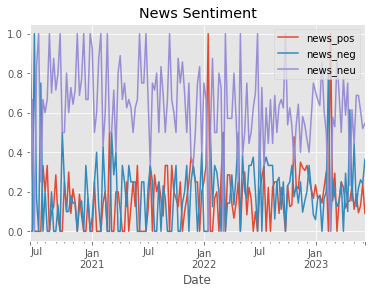

In [417]:
news_weight.plot(x='Date', y=['news_pos','news_neg','news_neu'], title='News Sentiment')


### Combining Historical, Sentiment and Trends Data

In [204]:
df_combined.drop('ticker', inplace=True, axis=1)
df_combined.head()

,open,high,low,close,adjclose,volume,TwoWeeks,Month,Home Depot
2020-07-06,250.270004,251.500000,247.039993,249.550003,232.537186,3133800.0,247.481999,248.1370,90.0
2020-07-07,247.369995,250.779999,247.070007,247.350006,230.487167,2927800.0,247.300999,247.6660,90.0
2020-07-08,247.869995,249.789993,246.220001,249.169998,232.183075,2294000.0,247.187000,247.2865,90.0
2020-07-09,249.660004,250.509995,246.350006,247.960007,231.055588,2994700.0,247.370000,246.9620,90.0
2020-07-10,248.289993,250.330002,246.639999,250.110001,233.058990,2745300.0,247.842999,247.4940,90.0


In [205]:
df_combined = df_combined.reset_index()

In [206]:
df_combined.rename(columns={'index':'Date'}, inplace=True)
df_combined.head()

,Date,open,high,low,close,adjclose,volume,TwoWeeks,Month,Home Depot
0,2020-07-06,250.270004,251.500000,247.039993,249.550003,232.537186,3133800.0,247.481999,248.1370,90.0
1,2020-07-07,247.369995,250.779999,247.070007,247.350006,230.487167,2927800.0,247.300999,247.6660,90.0
2,2020-07-08,247.869995,249.789993,246.220001,249.169998,232.183075,2294000.0,247.187000,247.2865,90.0
3,2020-07-09,249.660004,250.509995,246.350006,247.960007,231.055588,2994700.0,247.370000,246.9620,90.0
4,2020-07-10,248.289993,250.330002,246.639999,250.110001,233.058990,2745300.0,247.842999,247.4940,90.0


In [207]:
import numpy as np
df_weekly = pd.DataFrame(df_combined.groupby([pd.Grouper(key='Date', freq='W')]).agg(np.mean))
df_weekly.head()

,open,high,low,close,adjclose,volume,TwoWeeks,Month,Home Depot
Date,,,,,,,,,
2020-07-12,248.691998,250.581998,246.664001,248.828003,231.864401,2819120.0,247.436599,247.509100,90.0
2020-07-19,255.570004,259.695996,253.284000,256.733997,239.231400,3799580.0,250.709800,249.001500,86.0
2020-07-26,263.217999,265.070001,261.105994,263.376007,245.420612,2661120.0,256.946602,252.191601,85.0
2020-08-02,265.357996,267.876001,263.217999,265.832001,247.709158,2700400.0,263.277204,256.993502,85.0
2020-08-09,267.792004,270.044006,266.348004,268.508002,250.202713,2319420.0,266.128600,261.537601,80.0


In [211]:
df_final = df_weekly.merge(news_weight, on='Date').merge(tweets_weight, on='Date')
df_final.columns = [i.lower() for i in df_final.columns]
df_final.head()

,date,open,high,low,close,adjclose,volume,twoweeks,month,home depot,news_pos,news_neg,news_neu,tweet_pos,tweet_neg,tweet_neu
0,2020-07-12,248.691998,250.581998,246.664001,248.828003,231.864401,2819120.0,247.436599,247.509100,90.0,0.000000,0.00,1.000000,0.000000,0.166667,0.833333
1,2020-07-19,255.570004,259.695996,253.284000,256.733997,239.231400,3799580.0,250.709800,249.001500,86.0,0.000000,0.75,0.250000,0.000000,0.400000,0.600000
2,2020-07-26,263.217999,265.070001,261.105994,263.376007,245.420612,2661120.0,256.946602,252.191601,85.0,0.333333,0.00,0.666667,0.125000,0.125000,0.750000
3,2020-08-02,265.357996,267.876001,263.217999,265.832001,247.709158,2700400.0,263.277204,256.993502,85.0,0.200000,0.20,0.600000,0.181818,0.272727,0.545455
4,2020-08-09,267.792004,270.044006,266.348004,268.508002,250.202713,2319420.0,266.128600,261.537601,80.0,0.333333,0.00,0.666667,0.333333,0.222222,0.444444


In [212]:
df_final.rename(columns={"home depot":"trends"}, inplace=True)
df_final.head()

,date,open,high,low,close,adjclose,volume,twoweeks,month,trends,news_pos,news_neg,news_neu,tweet_pos,tweet_neg,tweet_neu
0,2020-07-12,248.691998,250.581998,246.664001,248.828003,231.864401,2819120.0,247.436599,247.509100,90.0,0.000000,0.00,1.000000,0.000000,0.166667,0.833333
1,2020-07-19,255.570004,259.695996,253.284000,256.733997,239.231400,3799580.0,250.709800,249.001500,86.0,0.000000,0.75,0.250000,0.000000,0.400000,0.600000
2,2020-07-26,263.217999,265.070001,261.105994,263.376007,245.420612,2661120.0,256.946602,252.191601,85.0,0.333333,0.00,0.666667,0.125000,0.125000,0.750000
3,2020-08-02,265.357996,267.876001,263.217999,265.832001,247.709158,2700400.0,263.277204,256.993502,85.0,0.200000,0.20,0.600000,0.181818,0.272727,0.545455
4,2020-08-09,267.792004,270.044006,266.348004,268.508002,250.202713,2319420.0,266.128600,261.537601,80.0,0.333333,0.00,0.666667,0.333333,0.222222,0.444444


In [389]:
#df_final.to_csv('final_home_depot.csv')

In [213]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
df_final_scaled = pd.DataFrame(SS.fit_transform(df_final.iloc[:,1:]), columns=df_final.columns[1:])
df_final_scaled.insert(0, "date", df_final['date'])
df_final_scaled.head()

,date,open,high,low,close,adjclose,volume,twoweeks,month,trends,news_pos,news_neg,news_neu,tweet_pos,tweet_neg,tweet_neu
0,2020-07-12,-1.703818,-1.730261,-1.682950,-1.705764,-1.872820,-0.840392,-1.738792,-1.736071,2.580289,-1.106820,-1.193801,1.766450,-1.503002,-0.103907,1.464049
1,2020-07-19,-1.505790,-1.470011,-1.490960,-1.477822,-1.658905,-0.124160,-1.644438,-1.692888,2.198301,-1.106820,3.504942,-1.899286,-1.503002,1.212374,0.306837
2,2020-07-26,-1.285591,-1.316556,-1.264110,-1.286323,-1.479190,-0.955812,-1.464655,-1.600581,2.102805,1.052492,-1.193801,0.137234,-0.824220,-0.338957,1.050759
3,2020-08-02,-1.223978,-1.236431,-1.202859,-1.215514,-1.412737,-0.927118,-1.282168,-1.461636,2.102805,0.188767,0.059197,-0.188609,-0.515683,0.494403,0.036320
4,2020-08-09,-1.153899,-1.174523,-1.112084,-1.138360,-1.340332,-1.205426,-1.199974,-1.330150,1.625320,1.052492,-1.193801,0.137234,0.307084,0.209494,-0.464638


In [214]:
df_final_scaled.corr().round(3)

<ipython-input-214-f6a92ee3555b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final_scaled.corr().round(3)


,open,high,low,close,adjclose,volume,twoweeks,month,trends,news_pos,news_neg,news_neu,tweet_pos,tweet_neg,tweet_neu
open,1.000,0.999,0.999,0.998,0.986,-0.051,0.983,0.954,-0.221,0.241,-0.043,-0.148,0.009,-0.075,0.058
high,0.999,1.000,0.998,0.999,0.988,-0.040,0.982,0.954,-0.227,0.246,-0.038,-0.156,0.010,-0.074,0.056
low,0.999,0.998,1.000,0.999,0.985,-0.075,0.978,0.947,-0.210,0.238,-0.045,-0.145,0.008,-0.079,0.062
close,0.998,0.999,0.999,1.000,0.988,-0.059,0.978,0.949,-0.218,0.245,-0.041,-0.152,0.009,-0.077,0.059
adjclose,0.986,0.988,0.985,0.988,1.000,-0.042,0.970,0.945,-0.321,0.267,-0.013,-0.192,0.011,-0.072,0.053
volume,-0.051,-0.040,-0.075,-0.059,-0.042,1.000,0.018,0.058,-0.057,0.048,-0.005,-0.032,0.014,0.090,-0.092
twoweeks,0.983,0.982,0.978,0.978,0.970,0.018,1.000,0.986,-0.266,0.248,-0.035,-0.160,0.006,-0.077,0.062
month,0.954,0.954,0.947,0.949,0.945,0.058,0.986,1.000,-0.311,0.229,-0.034,-0.146,-0.003,-0.074,0.068
trends,-0.221,-0.227,-0.210,-0.218,-0.321,-0.057,-0.266,-0.311,1.000,-0.227,-0.072,0.227,-0.015,0.006,0.008
news_pos,0.241,0.246,0.238,0.245,0.267,0.048,0.248,0.229,-0.227,1.000,-0.151,-0.637,-0.074,0.002,0.066


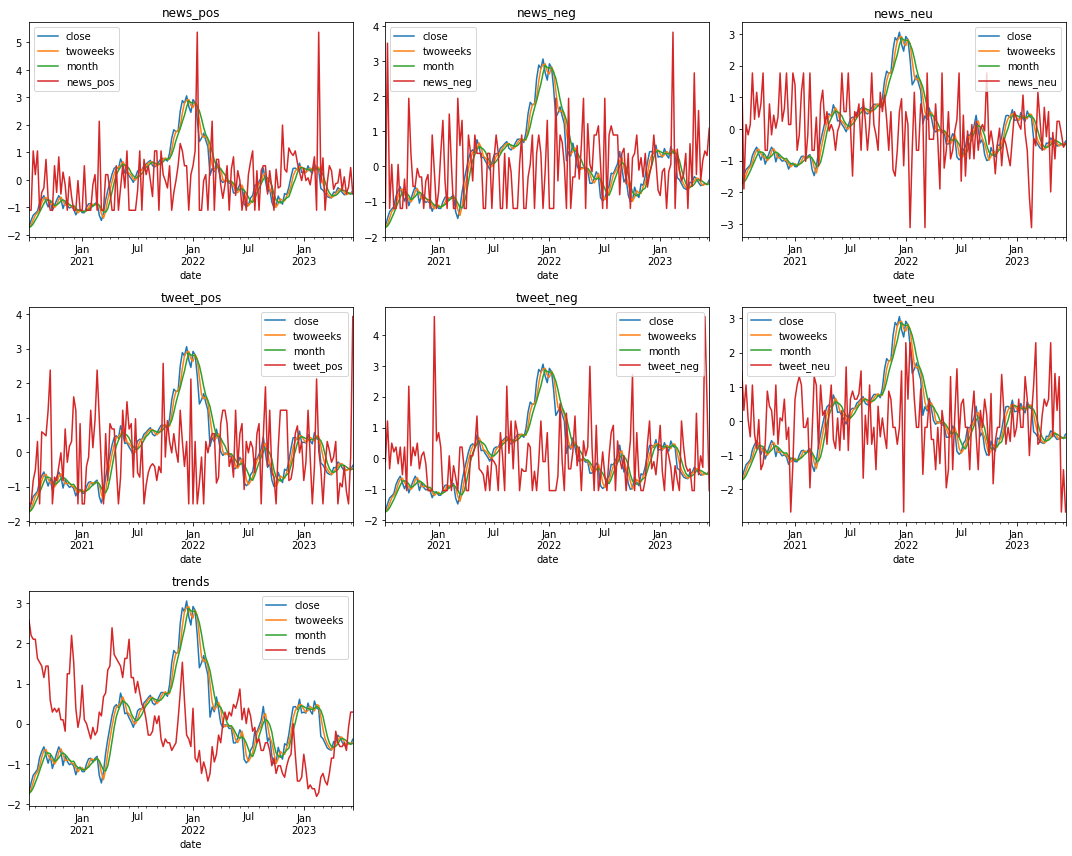

In [215]:
cols=['news_pos', 'news_neg','news_neu', 'tweet_pos', 'tweet_neg','tweet_neu', 'trends']
fig, ax =plt.subplots(3,3, figsize=(15, 12))
ax=ax.ravel()
for i in range(len(cols)):
    df_final_scaled.plot(x='date', y=['close','twoweeks','month', cols[i]], ax=ax[i], title=cols[i])
    ax[7].axis('off')
    ax[8].axis('off')
plt.tight_layout()

In [418]:
x= df_final[['open','high','low','close', 'adjclose','volume','news_pos', 'news_neg', 'news_neu', 'tweet_pos',
       'tweet_neg', 'tweet_neu', 'trends']]
y=df_final['twoweeks']

In [420]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               twoweeks   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     537.8
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          3.14e-109
Time:                        22:05:28   Log-Likelihood:                -472.05
No. Observations:                 153   AIC:                             968.1
Df Residuals:                     141   BIC:                             1004.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4694      3.880      2.183      0.0

In [281]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
reduced_df = pd.DataFrame(pca.fit_transform(df_values), columns=(["c1","c2", "c3"]))
reduced_df.head()

,c1,c2,c3
0,6.189554,0.209655,-1.552672
1,6.013361,-1.682504,0.591871
2,5.913066,-2.363471,-1.661985
3,5.345789,1.450829,-0.562369
4,5.178115,0.141462,-0.229300


In [280]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
clusters= km.fit_predict(reduced_df)
pca_clust = reduced_df.copy()
pca_clust['clusters']=clusters
pca_clust.head()


C:\Users\h\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [286]:
!pip install --upgrade threadpoolctl

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.1.0
    Uninstalling threadpoolctl-2.1.0:
      Successfully uninstalled threadpoolctl-2.1.0


In [289]:
!pip install numpy==1.21.4

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\h\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.21.4-cp38-cp38-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [290]:
import sklearn
from sklearn.cluster import KMeans
#df_values = df_final_scaled.iloc[:,1:].copy()
distances = []
k_values = range(2,10)
for cluster in k_values:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(reduced_df)
    distances.append(kmeans.inertia_)
plt.plot(k_values, distances,'bx-')
plt.xlabel('Number of clusters') 
plt.ylabel('Sum of Distances') 
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

C:\Users\h\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [274]:
df_values.isna().sum()

open         0
high         0
low          0
close        0
adjclose     0
volume       0
twoweeks     0
month        0
news_pos     0
news_neg     0
news_neu     0
tweet_pos    0
tweet_neg    0
tweet_neu    0
trends       0
dtype: int64

In [288]:
from yellowbrick.cluster import KElbowVisualizer
auto_elbow = KElbowVisualizer(KMeans(), k=10)
auto_elbow.fit(df_values)
auto_elbow.show()

C:\Users\h\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [271]:
df_values.head()

,open,high,low,close,adjclose,volume,twoweeks,month,news_pos,news_neg,news_neu,tweet_pos,tweet_neg,tweet_neu,trends
0,-2.282224,-2.292033,-2.283287,-2.290166,-2.290166,0.396026,-2.258981,-2.278783,1.339034,-0.532704,-0.478444,-1.709418,0.234655,1.403842,-0.820997
1,-2.193009,-2.177905,-2.179273,-2.166838,-2.166838,1.696886,-2.238535,-2.254227,0.477491,-1.053367,0.632240,0.864629,-1.195652,0.267652,0.245028
2,-1.907119,-1.884136,-1.917089,-1.877150,-1.877150,2.864211,-2.104815,-2.171190,1.601972,-1.639660,0.359655,-0.565397,-1.195652,1.620259,0.378281
3,-1.744724,-1.733720,-1.788008,-1.784285,-1.784285,3.324299,-1.884002,-2.051805,1.161958,0.820220,-1.607701,0.292618,0.592231,-0.814433,0.711414
4,-1.725233,-1.715204,-1.761146,-1.751946,-1.751946,2.745739,-1.760564,-1.921442,0.646767,0.336714,-0.783446,0.578624,-0.599691,-0.002869,-0.287984


In [385]:
#df_final_scaled.to_csv('df_final_home_depot.csv')

### Applying Linear Regression on Historical Price Data:

In [345]:
%matplotlib inline
plt.style.use("ggplot")

In [395]:
df_final_scaled.head()

,date,open,high,low,close,adjclose,volume,twoweeks,month,trends,news_pos,news_neg,news_neu,tweet_pos,tweet_neg,tweet_neu
0,2020-07-12,-1.703818,-1.730261,-1.682950,-1.705764,-1.872820,-0.840392,-1.738792,-1.736071,2.580289,-1.106820,-1.193801,1.766450,-1.503002,-0.103907,1.464049
1,2020-07-19,-1.505790,-1.470011,-1.490960,-1.477822,-1.658905,-0.124160,-1.644438,-1.692888,2.198301,-1.106820,3.504942,-1.899286,-1.503002,1.212374,0.306837
2,2020-07-26,-1.285591,-1.316556,-1.264110,-1.286323,-1.479190,-0.955812,-1.464655,-1.600581,2.102805,1.052492,-1.193801,0.137234,-0.824220,-0.338957,1.050759
3,2020-08-02,-1.223978,-1.236431,-1.202859,-1.215514,-1.412737,-0.927118,-1.282168,-1.461636,2.102805,0.188767,0.059197,-0.188609,-0.515683,0.494403,0.036320
4,2020-08-09,-1.153899,-1.174523,-1.112084,-1.138360,-1.340332,-1.205426,-1.199974,-1.330150,1.625320,1.052492,-1.193801,0.137234,0.307084,0.209494,-0.464638


In [346]:
x= df_final_scaled[['open','high','low','close', 'adjclose','volume']]
y=df_final_scaled['twoweeks']

In [347]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3 , shuffle=False,random_state = 0)

In [348]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [ 2.15513818  0.1568129  -0.63183193 -0.94351993  0.2494587   0.05989017]
regression intercept 0.017827179785784547


In [349]:
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.8354280496114082


In [350]:
predicted=regression.predict(test_x)
print(test_x.head())

         open      high       low     close  adjclose    volume
107 -0.243796 -0.255966 -0.239776 -0.208430 -0.104242 -0.699127
108 -0.115385 -0.079953 -0.082182 -0.058794  0.042456 -0.785429
109  0.099918  0.070874  0.110736  0.082941  0.181410 -0.899154
110  0.366759  0.437578  0.380624  0.428573  0.520257  0.542134
111  0.080282  0.039007  0.007433 -0.028003  0.072644 -0.737113


In [351]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
107,-0.251375,-0.267445
108,-0.142925,-0.172431
109,-0.051125,0.087459
110,0.166720,0.394254
111,0.250333,0.192664
112,-0.043019,-0.309534
113,-0.333535,-0.397486
114,-0.476311,-0.423891
115,-0.740981,-0.954391
116,-0.992016,-0.840699


In [352]:
dfr.describe()


,Actual_Price,Predicted_Price
count,46.000000,46.000000
mean,-0.191756,-0.132461
std,0.438800,0.433547
min,-0.992016,-0.954391
25%,-0.502699,-0.417290
50%,-0.331794,-0.271980
75%,0.274308,0.247046
max,0.478988,0.858482


In [353]:
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.14249150773348185
Mean Squared Error (MSE) : 0.030998755667901827
Root Mean Squared Error (RMSE): 0.17606463491542482


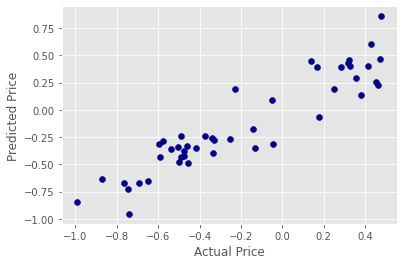

In [354]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

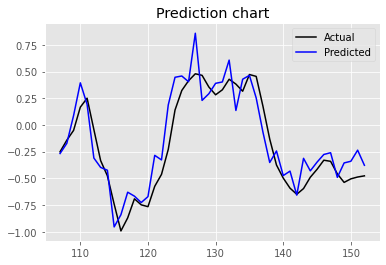

In [355]:
plt.plot(dfr.Actual_Price, color='black', label='Actual')
plt.plot(dfr.Predicted_Price, color='blue',label='Predicted')
plt.title("Prediction chart")
plt.legend()


### Applying Linear Regression to both historical and newly added features: 

In [356]:
df_final_scaled.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume',
       'twoweeks', 'month', 'trends', 'news_pos', 'news_neg', 'news_neu',
       'tweet_pos', 'tweet_neg', 'tweet_neu'],
      dtype='object')

In [357]:
x= df_final_scaled[['open','high','low','close', 'adjclose','volume','news_pos', 'news_neg', 'news_neu', 'tweet_pos',
       'tweet_neg', 'tweet_neu', 'trends']]
y=df_final_scaled['twoweeks']

In [358]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3 , shuffle=False,random_state = 0)
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [ 1.91871810e+00  1.89637622e-01 -3.49725608e-01 -8.35917172e-01
  4.63540880e-02  6.48403899e-02  1.45467759e-03  5.40953328e-03
 -5.31782650e-03 -3.13379351e-03 -7.57685954e-03  9.52332816e-03
 -5.55338621e-02]
regression intercept 0.02376563125818868


In [359]:
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.8294859517339381


In [360]:
predicted=regression.predict(test_x)
print(test_x.head())

         open      high       low     close  adjclose    volume  news_pos  \
107 -0.243796 -0.255966 -0.239776 -0.208430 -0.104242 -0.699127  0.332721   
108 -0.115385 -0.079953 -0.082182 -0.058794  0.042456 -0.785429 -1.106820   
109  0.099918  0.070874  0.110736  0.082941  0.181410 -0.899154  0.332721   
110  0.366759  0.437578  0.380624  0.428573  0.520257  0.542134  0.512664   
111  0.080282  0.039007  0.007433 -0.028003  0.072644 -0.737113  0.512664   

     news_neg  news_neu  tweet_pos  tweet_neg  tweet_neu    trends  
107  0.894529 -0.948910   0.533344   1.071344  -1.428981 -0.475612  
108  0.894529  0.137234   0.824251  -1.044107   0.165137 -0.380115  
109  0.894529 -0.948910  -1.503002   0.567665   0.873634 -0.666606  
110 -0.802239  0.239060   0.471637  -0.018434  -0.414542 -0.666606  
111  0.372447 -0.677374   1.890908  -0.338957  -1.428981 -0.475612  


In [361]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
107,-0.251375,-0.271245
108,-0.142925,-0.153351
109,-0.051125,0.127086
110,0.166720,0.405224
111,0.250333,0.177392
112,-0.043019,-0.300313
113,-0.333535,-0.381184
114,-0.476311,-0.385414
115,-0.740981,-0.939092
116,-0.992016,-0.805985


In [362]:
dfr.describe()


,Actual_Price,Predicted_Price
count,46.000000,46.000000
mean,-0.191756,-0.112709
std,0.438800,0.438281
min,-0.992016,-0.939092
25%,-0.502699,-0.419594
50%,-0.331794,-0.269632
75%,0.274308,0.268095
max,0.478988,0.895990


In [363]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 0.14758907019543635
Mean Squared Error (MSE) : 0.03211800861364085
Root Mean Squared Error (RMSE): 0.17921497876472506


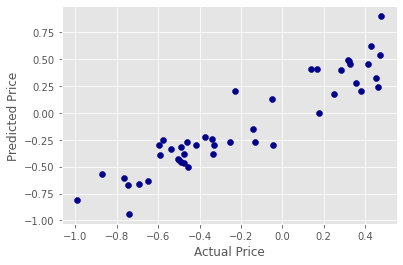

In [364]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

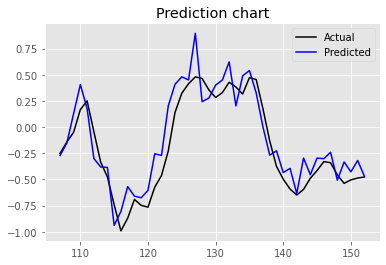

In [365]:
plt.plot(dfr.Actual_Price, color='black', label='Actual')
plt.plot(dfr.Predicted_Price, color='blue',label='Predicted')
plt.title("Prediction chart")
plt.legend()


### Applying CNN+LSTM:

In [375]:
df.head()

,open,high,low,close,adjclose,volume,ticker
2020-06-08,252.490005,256.809998,252.259995,256.769989,239.264954,3811900,HD
2020-06-09,255.330002,258.290009,253.860001,256.760010,239.255646,3716100,HD
2020-06-10,257.450012,259.290009,254.220001,254.449997,237.103104,3589800,HD
2020-06-11,248.860001,250.619995,238.740005,239.470001,223.144394,6563700,HD
2020-06-12,243.070007,246.389999,237.050003,242.449997,225.921204,5238500,HD


In [376]:
df = df.reset_index()
df.drop('ticker', inplace=True, axis=1)
df.rename(columns={'index':'date'}, inplace=True)
df.head()

,date,open,high,low,close,adjclose,volume
0,2020-06-08,252.490005,256.809998,252.259995,256.769989,239.264954,3811900
1,2020-06-09,255.330002,258.290009,253.860001,256.760010,239.255646,3716100
2,2020-06-10,257.450012,259.290009,254.220001,254.449997,237.103104,3589800
3,2020-06-11,248.860001,250.619995,238.740005,239.470001,223.144394,6563700
4,2020-06-12,243.070007,246.389999,237.050003,242.449997,225.921204,5238500


In [386]:
#df.to_csv('original_home_depot.csv')

In [391]:
X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


In [392]:
!pip install --user numpy==1.21

In [393]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

AttributeError: module 'numpy' has no attribute 'typeDict'